# FLIGHT DELAY PREDICTION

#### Imports

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sample/data.csv')
columns = data.columns
for i in columns:
    if(i == "Unnamed: 0"):
        data = data.drop(i, axis =1)

In [3]:
data.head(10)

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
0,2016,3,8,27,2016-08-27,11292,DEN,12889,LAS,600,...,47,0.0,1012,8,10,113,78,77,30,49
1,2016,3,8,27,2016-08-27,12892,LAX,12889,LAS,620,...,47,0.0,1012,8,10,113,78,77,30,49
2,2016,3,8,27,2016-08-27,12889,LAS,13204,MCO,736,...,60,0.7,1016,23,10,386,84,85,84,53
3,2016,3,8,27,2016-08-27,10397,ATL,13204,MCO,1350,...,60,0.7,1016,23,10,386,84,85,84,53
4,2016,3,8,27,2016-08-27,11298,DFW,13204,MCO,1120,...,60,0.7,1016,23,10,386,84,85,84,53
5,2016,3,8,27,2016-08-27,13930,ORD,13204,MCO,1136,...,60,0.7,1016,23,10,386,84,85,84,53
6,2016,3,8,27,2016-08-27,11618,EWR,13204,MCO,1200,...,60,0.7,1016,23,10,386,84,85,84,53
7,2016,3,8,27,2016-08-27,13303,MIA,13204,MCO,1400,...,60,0.7,1016,23,10,386,84,85,84,53
8,2016,3,8,27,2016-08-27,11057,CLT,13204,MCO,1305,...,60,0.7,1016,23,10,386,84,85,84,53
9,2016,3,8,27,2016-08-27,11298,DFW,13204,MCO,1105,...,60,0.7,1016,23,10,386,84,85,84,53


#### Label encoding the data to avoid errors

In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [5]:
data.head(10)

,Year,Quarter,Month,DayofMonth,FlightDate,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,...,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity
0,2016,3,8,27,239,11292,2,12889,7,600,...,47,0.0,1012,8,10,113,78,77,30,49
1,2016,3,8,27,239,12892,8,12889,7,620,...,47,0.0,1012,8,10,113,78,77,30,49
2,2016,3,8,27,239,12889,7,13204,9,736,...,60,0.7,1016,23,10,386,84,85,84,53
3,2016,3,8,27,239,10397,0,13204,9,1350,...,60,0.7,1016,23,10,386,84,85,84,53
4,2016,3,8,27,239,11298,3,13204,9,1120,...,60,0.7,1016,23,10,386,84,85,84,53
5,2016,3,8,27,239,13930,11,13204,9,1136,...,60,0.7,1016,23,10,386,84,85,84,53
6,2016,3,8,27,239,11618,4,13204,9,1200,...,60,0.7,1016,23,10,386,84,85,84,53
7,2016,3,8,27,239,13303,10,13204,9,1400,...,60,0.7,1016,23,10,386,84,85,84,53
8,2016,3,8,27,239,11057,1,13204,9,1305,...,60,0.7,1016,23,10,386,84,85,84,53
9,2016,3,8,27,239,11298,3,13204,9,1105,...,60,0.7,1016,23,10,386,84,85,84,53


### Choosing The Best of the classifiers 

Extratrees
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93    297842
         1.0       0.68      0.86      0.76     77618

    accuracy                           0.89    375460
   macro avg       0.82      0.88      0.84    375460
weighted avg       0.90      0.89      0.89    375460
 



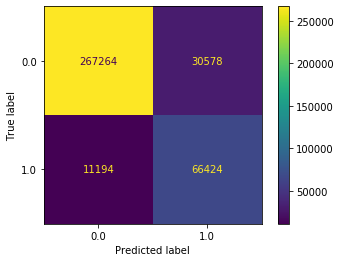

In [6]:
#feature selection
clf_data = data[['DepDel15', 'DepDelayMinutes', 'DepTime', 'CRSDepTime','CarrierDelay','weatherCode', 'precipMM', 'windspeedKmph', 'WindGustKmph', 'pressure','Dest', 'DestAirportID','DewPointF', 'cloudcover', 'tempF', 'WindChillF', 'Month', 'ArrDel15']]

#train_test_split
from sklearn.model_selection import train_test_split
x = clf_data.loc[:, clf_data.columns != 'ArrDel15']
y = clf_data['ArrDel15']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 1)

    
#resampling technique
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
xtrain_under, ytrain_under = undersample.fit_resample(x_train, y_train)


#extratrees 
from sklearn.ensemble import ExtraTreesClassifier
clf_extratree = ExtraTreesClassifier()
clf_extratree.fit(xtrain_under, ytrain_under)
y_pred_extratree_under = clf_extratree.predict(x_test)

from sklearn import metrics
from sklearn.metrics import classification_report as cr
print('Extratrees\r')
print(cr(y_test, y_pred_extratree_under), '\n')
metrics.plot_confusion_matrix(clf_extratree, x_test, y_test)
plt.show()


In [7]:
#using the trained classifier model to predict the delay which we use further down the code
clf_data['delayornot'] = clf_extratree.predict(x)

from sklearn import metrics
print("The acuuracy is", round(metrics.accuracy_score(clf_data['ArrDel15'], clf_data['delayornot'])*100, 2), "%")

/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The acuuracy is 92.94 %


#### Selecting only those rows(i.e., flight details) that are classified to be delayed

In [8]:
reg_data = data[['Year', 'Quarter', 'Month', 'DayofMonth','Origin', 'OriginAirportID', 'Dest', 'DestAirportID', 'CRSDepTime','DepTime', 'DepDelayMinutes','DepDel15','CarrierDelay', 'windspeedKmph', 'DewPointF', 'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility', 'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity']]
reg_data['delayornot'] = clf_data['delayornot']
reg_data = reg_data[reg_data['delayornot'] == 1]
reg_data

/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Quarter,Month,DayofMonth,Origin,OriginAirportID,Dest,DestAirportID,CRSDepTime,DepTime,...,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,delayornot
7,2016,3,8,27,10,13303,9,13204,1400,1729.0,...,0.7,1016,23,10,386,84,85,84,53,1.0
12,2016,3,8,27,14,14771,9,13204,15,100.0,...,0.0,1016,10,5,143,83,80,45,87,1.0
24,2016,3,8,27,8,12892,5,12266,52,113.0,...,0.4,1014,9,7,353,75,74,343,99,1.0
28,2016,3,8,27,2,11292,14,14771,755,748.0,...,0.0,1016,11,10,122,64,63,238,80,1.0
29,2016,3,8,27,13,14747,14,14771,730,730.0,...,0.0,1016,11,10,122,64,63,238,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877272,2016,2,5,7,2,11292,0,10397,2359,53.0,...,0.0,1015,9,10,113,53,54,301,62,1.0
1877273,2016,2,5,7,2,11292,1,11057,2345,102.0,...,0.0,1012,16,10,113,53,53,268,65,1.0
1877274,2016,2,5,7,7,12889,10,13303,2300,16.0,...,0.0,1014,21,10,113,66,64,307,71,1.0
1877281,2016,2,5,17,2,11292,1,11057,2345,115.0,...,0.9,1021,13,9,353,64,64,160,74,1.0


#### Selecting the dependant and independant features for the regression

In [9]:
#adding the target column 'ArrDelayMinutes' which was avoided during designing classifier model.
reg_data_index = reg_data.index.tolist()
for i in reg_data_index:
    reg_data.loc[i, 'ArrDelayMinutes'] = data.loc[i, 'ArrDelayMinutes']

In [10]:
X = reg_data.loc[:, reg_data.columns != 'ArrDelayMinutes']
print(X.shape)

Y = reg_data['ArrDelayMinutes']

(497936, 26)


In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(f_regression, k=25)#here f_classif method is nothing but using ANOVA table.
fit = bestfeatures.fit(X, Y)


#creating a dataframe to visualise the scores
Scores = pd.DataFrame(fit.scores_)
Columns = pd.DataFrame(X.columns)

rank = pd.concat([Columns, Scores], axis =1)
rank.columns = ['Features', 'Score']


rank = rank.nlargest(25, 'Score')
print(rank)
features = rank['Features'].tolist()#list of names of the required columns

           Features         Score
10  DepDelayMinutes  5.073121e+06
12     CarrierDelay  3.043254e+05
11         DepDel15  5.823170e+04
9           DepTime  3.255440e+03
18     WindGustKmph  2.489658e+03
13    windspeedKmph  1.798177e+03
8        CRSDepTime  1.486402e+03
16         precipMM  1.294956e+03
20      weatherCode  1.126937e+03
14        DewPointF  7.005033e+02
17         pressure  4.717191e+02
19       visibility  3.241350e+02
24         humidity  2.530090e+02
7     DestAirportID  2.101347e+02
15       cloudcover  1.695880e+02
6              Dest  1.658958e+02
22       WindChillF  9.328063e+01
21            tempF  9.145029e+01
2             Month  7.893808e+01
1           Quarter  4.310204e+01
3        DayofMonth  1.756696e+01
4            Origin  3.558600e+00
5   OriginAirportID  5.364099e-01
23    winddirDegree  3.104427e-01
0              Year  1.680325e-01


/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sowmiya/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [12]:
X = X[['DepDelayMinutes', 'DepDel15','CarrierDelay', 'weatherCode', 'precipMM', 'WindGustKmph', 'windspeedKmph', 'DepTime', 'DewPointF', 'pressure', 'cloudcover', 'CRSDepTime', 'visibility', 'tempF', 'WindChillF', 'humidity', 'Dest']]

X


,DepDelayMinutes,DepDel15,CarrierDelay,weatherCode,precipMM,WindGustKmph,windspeedKmph,DepTime,DewPointF,pressure,cloudcover,CRSDepTime,visibility,tempF,WindChillF,humidity,Dest
7,209.0,1.0,209.0,386,0.7,23,19,1729.0,75,1016,60,1400,10,84,85,53,9
12,45.0,1.0,37.0,143,0.0,10,8,100.0,76,1016,54,15,5,83,80,87,9
24,21.0,1.0,20.0,353,0.4,9,5,113.0,74,1014,100,52,7,75,74,99,5
28,0.0,0.0,0.0,122,0.0,11,9,748.0,56,1016,86,755,10,64,63,80,14
29,0.0,0.0,0.0,122,0.0,11,9,730.0,56,1016,86,730,10,64,63,80,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877272,54.0,1.0,37.0,113,0.0,9,8,53.0,43,1015,0,2359,10,53,54,62,0
1877273,77.0,1.0,0.0,113,0.0,16,8,102.0,44,1012,4,2345,10,53,53,65,1
1877274,76.0,1.0,44.0,113,0.0,21,14,16.0,54,1014,0,2300,10,66,64,71,10
1877281,90.0,1.0,0.0,353,0.9,13,9,115.0,55,1021,100,2345,9,64,64,74,1


## TRAIN & TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state = 1)

### LINEAR REGRESSOR

In [14]:
from sklearn.linear_model import LinearRegression
import math

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

Y_pred_lr = linear_regressor.predict(X_test)

from sklearn import metrics
print("Root Mean Squared Error -", round(math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lr)), 2))
print("Mean Absolute Error -", round(metrics.mean_absolute_error(Y_test, Y_pred_lr), 2))
print("r-squared -", round(metrics.r2_score(Y_test, Y_pred_lr)*100, 2), "%")
print("Explained Variance Score", round(metrics.explained_variance_score(Y_test, Y_pred_lr)*100, 2), "%")

Root Mean Squared Error - 20.24
Mean Absolute Error - 12.83
r-squared - 91.19 %
Explained Variance Score 91.19 %


### RIDGE REGRESSION

In [15]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, Y_train)

Y_pred_ridge = ridge_reg.predict(X_test)

from sklearn import metrics
print("Root Mean Squared Error -", round(math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge)), 2))
print("Mean Absolute Error -", round(metrics.mean_absolute_error(Y_test, Y_pred_ridge), 2))
print("r-squared -", round(metrics.r2_score(Y_test, Y_pred_ridge)*100, 2), "%")
print("Explained Variance Score", round(metrics.explained_variance_score(Y_test, Y_pred_ridge)*100, 2), "%")

Root Mean Squared Error - 20.24
Mean Absolute Error - 12.83
r-squared - 91.19 %
Explained Variance Score 91.19 %


### LASSO REGRESSION

In [16]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Y_pred_lasso = lasso_reg.predict(X_test)

from sklearn import metrics
print("Root Mean Squared Error -", round(math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso)), 2))
print("Mean Absolute Error -", round(metrics.mean_absolute_error(Y_test, Y_pred_lasso), 2))
print("r-squared -", round(metrics.r2_score(Y_test, Y_pred_lasso)*100, 2), "%")
print("Explained Variance Score", round(metrics.explained_variance_score(Y_test, Y_pred_lasso)*100, 2), "%")

Root Mean Squared Error - 20.36
Mean Absolute Error - 13.01
r-squared - 91.09 %
Explained Variance Score 91.09 %


### EXTRATREES REGRESSOR

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import math

extratree = ExtraTreesRegressor()
extratree.fit(X_train, Y_train)

Y_pred_extratree = extratree.predict(X_test)

from sklearn import metrics
print("Root Mean Squared Error -", round(math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_extratree)), 2))
print("Mean Absolute Error -", round(metrics.mean_absolute_error(Y_test, Y_pred_extratree), 2))
print("r-squared -", round(metrics.r2_score(Y_test, Y_pred_extratree)*100, 2), "%")
print("Explained Variance Score", round(metrics.explained_variance_score(Y_test, Y_pred_extratree)*100, 2), "%")

Root Mean Squared Error - 20.5
Mean Absolute Error - 12.58
r-squared - 90.97 %
Explained Variance Score 90.97 %


### XGBOOST REGRESSOR

In [18]:
import xgboost as xgb 
import math

XGB = xgb.XGBRegressor()
XGB.fit(X_train, Y_train)

Y_pred_XGB = XGB.predict(X_test)

from sklearn import metrics
print("Root Mean Squared Error -", round(math.sqrt(metrics.mean_squared_error(Y_test, Y_pred_XGB)), 2))
print("Mean Absolute Error -", round(metrics.mean_absolute_error(Y_test, Y_pred_XGB), 2))
print("r-squared -", round(metrics.r2_score(Y_test, Y_pred_XGB)*100, 2), "%")
print("Explained Variance Score", round(metrics.explained_variance_score(Y_test, Y_pred_XGB)*100, 2), "%")

Root Mean Squared Error - 19.85
Mean Absolute Error - 12.32
r-squared - 91.53 %
Explained Variance Score 91.53 %


### FUTURE USE DATA FILE

In [ ]:
X['delay'] = XGB.predict(X)

from sklearn import metrics
print("The acuuracy is", round(metrics.r2_score(Y, X['delay'])*100, 2), "%")

X['Dest'] = le.inverse_transform(X['Dest'])

result = X.append(y)
#X.to_csv('Sample/future.csv')

The acuuracy is 92.68 %


In [ ]:
result

### REGRESSION ANALYSIS

#### Visualising the overall distribution of the dependant variable('ArrDelayMinutes')

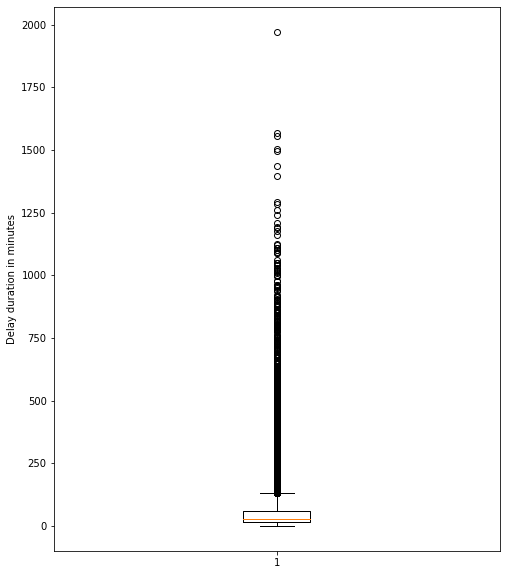

In [20]:
fig, ax = plt.subplots(figsize=(8, 10))
plt.boxplot(Y_test)
plt.ylabel('Delay duration in minutes')
plt.show()

#### Splitting the dataframe into 5 categories based on dependant variable

In [21]:
analysis_data = pd.concat([X_test, Y_test], axis=1)
analysis_data

,DepDelayMinutes,DepDel15,CarrierDelay,weatherCode,precipMM,WindGustKmph,windspeedKmph,DepTime,DewPointF,pressure,cloudcover,CRSDepTime,visibility,tempF,WindChillF,humidity,Dest,ArrDelayMinutes
1791368,17.0,1.0,0.0,332,1.3,22,20,617.0,21,1016,95,600,2,23,16,91,6,12.0
798858,11.0,0.0,4.0,113,0.0,8,6,1306.0,25,1011,0,1255,10,86,88,10,12,51.0
30114,53.0,1.0,0.0,113,0.0,24,21,1008.0,71,1011,0,915,10,89,88,55,3,63.0
1111402,96.0,1.0,6.0,143,0.1,12,8,1041.0,51,1025,61,905,6,55,53,91,14,102.0
1078606,86.0,1.0,0.0,113,0.0,24,14,1536.0,49,1019,14,1410,10,78,79,36,4,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496651,76.0,1.0,63.0,113,0.0,16,14,1326.0,14,1027,0,1210,10,57,57,18,2,63.0
884531,14.0,0.0,0.0,113,0.0,9,6,909.0,51,1022,59,855,10,59,60,70,13,1.0
586690,0.0,0.0,0.0,113,0.0,10,7,836.0,19,1023,0,840,10,42,38,43,7,19.0
475264,27.0,1.0,1.0,113,0.0,7,4,1937.0,51,1014,0,1910,10,89,89,34,12,33.0


In [22]:
split1 = analysis_data[analysis_data['ArrDelayMinutes'].between(0, 250)]
split2 = analysis_data[analysis_data['ArrDelayMinutes'].between(250, 500)]
split3 = analysis_data[analysis_data['ArrDelayMinutes'].between(500, 750)]
split4 = analysis_data[analysis_data['ArrDelayMinutes'].between(750, 1250)]
split5 = analysis_data[analysis_data['ArrDelayMinutes'].between(1250, 2100)]
splits = [split1, split2, split3, split4, split5]

#### Choosing the best of regressors

In [23]:
print(len(split1), len(split2), len(split3), len(split4), len(split5))

97603 1463 140 105 10


In [24]:
import xgboost as xgb 
import math

XGB = xgb.XGBRegressor()

for i in splits:
    data = i
    
    x = data.loc[:, data.columns!="ArrDelayMinutes"]
    y = data['ArrDelayMinutes']
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state=1)
        
    XGB.fit(x_train, y_train)
    y_pred = XGB.predict(x_test)
    
    print("Range -", i['ArrDelayMinutes'].min(), "to", i['ArrDelayMinutes'].max())
    print("MAE -", round(metrics.mean_absolute_error(y_test, y_pred), 2))
    print("RMSE -", round(math.sqrt(metrics.mean_squared_error(y_test, y_pred)), 2))
    print('\n')
    

Range - 0.0 to 250.0
MAE - 12.08
RMSE - 17.62


Range - 250.0 to 500.0
MAE - 15.85
RMSE - 22.4


Range - 500.0 to 746.0
MAE - 16.06
RMSE - 21.45


Range - 752.0 to 1240.0
MAE - 23.27
RMSE - 27.39


Range - 1262.0 to 1971.0
MAE - 17.02
RMSE - 17.49




# DONE